In [46]:
import csv
import sqlite3
import pandas as pd
from datetime import datetime
from time import sleep
import matplotlib.pyplot as plt

In [47]:
# connecting to the database
connection = sqlite3.connect('C:\\dev\\financial_data.sqlite')
# cursor
cursor = connection.cursor()

In [48]:
cursor.execute("""
select Date, Amount
from banktransactions
order by Date
""")
# .fetchall()

plot1_data = cursor.fetchall()
# display(plot1_data)

In [49]:
# Convert to DataFrame
df = pd.DataFrame(plot1_data, columns=['Date', 'Amount'])
# display(df)

#Convert Date column to datetime and extract year and month
df['Date'] = pd.to_datetime(df['Date']).dt.to_period('M')

# Aggregate data by month
monthly_balance = df.groupby('Date')['Amount'].sum()
# display(monthly_balance)

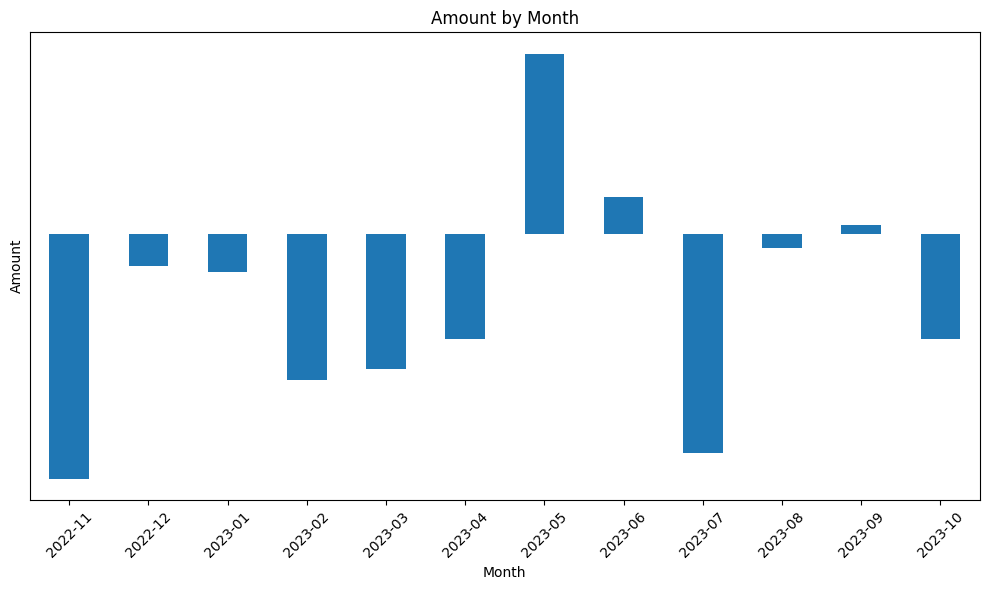

In [53]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_balance.plot(kind='bar')
plt.title('Amount by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.yticks([])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()